In [637]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [638]:
df = pd.read_csv('/content/cukdeh.csv')
df

,Tahun,Kota/KAB,Median Upah,TPT,PPP,UMK
0,2018,KAB. PACITAN,1440000,1.39,0.836,1509816.12
1,2018,KAB. PONOROGO,1500000,3.77,0.805,1509816.12
2,2018,KAB. TRENGGALEK,1400000,4.12,0.749,1509816.12
3,2018,KAB. TULUNGAGUNG,1500000,2.53,0.806,1671035.77
4,2018,KAB. BLITAR,1352000,3.38,0.760,1653383.98
...,...,...,...,...,...,...
147,2021,KOTA PASURUAN,1800000,6.23,0.910,2819801.59
148,2021,KOTA MOJOKERTO,2485000,6.87,0.986,2481302.97
149,2021,KOTA MADIUN,1800000,8.15,0.866,1954705.75
150,2021,KOTA SURABAYA,2900000,9.68,0.930,4300479.19


In [639]:
def normalize(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i])

    normalized = []
    for i in range(len(arr)):
        normalized.append((arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr)))
    return normalized

def normalize1(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i][0])

    normalized = []
    for i in range(len(arr)):
        normalized.append([(arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr))])
    return normalized

In [640]:
x_train = []
y_train = []

x_test = []
y_test = []

x = []
y = []

In [641]:
for i in range(len(df["PPP"])):
    x.append([
        df["PPP"][i],
        df["TPT"][i],
        df["Median Upah"][i],
        ])
    y.append([df["UMK"][i]])

In [642]:
x = np.array(x)
transpose = x.T

In [643]:
len(y)

152

In [644]:
x_norm = []
y_norm = normalize1(y)
y_norm_1 = normalize1(y)
for i in range(len(transpose)):
    x_norm.append(normalize(transpose[i]))

In [645]:
kota_kab = []
for i in range(len(df["Kota/KAB"])):
    if(i < 114):
        str_kota_kab = "" + df["Kota/KAB"][i] + " " + str(df['Tahun'][i])
        kota_kab.append(str_kota_kab)

kota_kab_test = []
for i in range(len(df["Kota/KAB"])):
    if(i >= 114):
        str_kota_kab = "" + df["Kota/KAB"][i]
        kota_kab_test.append(str_kota_kab)

In [646]:
for i in range(len(x_norm)):
    x_norm_temp_2 = []
    x_norm_temp_3 = []
    for j in range(len(x_norm[0])):
        if(j < 114):
            x_norm_temp_2.append(x_norm[i][j])
        if(j >= 114):
            x_norm_temp_3.append(x_norm[i][j])
    x_train.append(x_norm_temp_2)
    x_test.append(x_norm_temp_3)
    
for i in range(len(y_norm)):   
    if(i < 114):
        y_train.append(y_norm[i])
    if(i >= 114):
        y_test.append(y_norm[i])

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

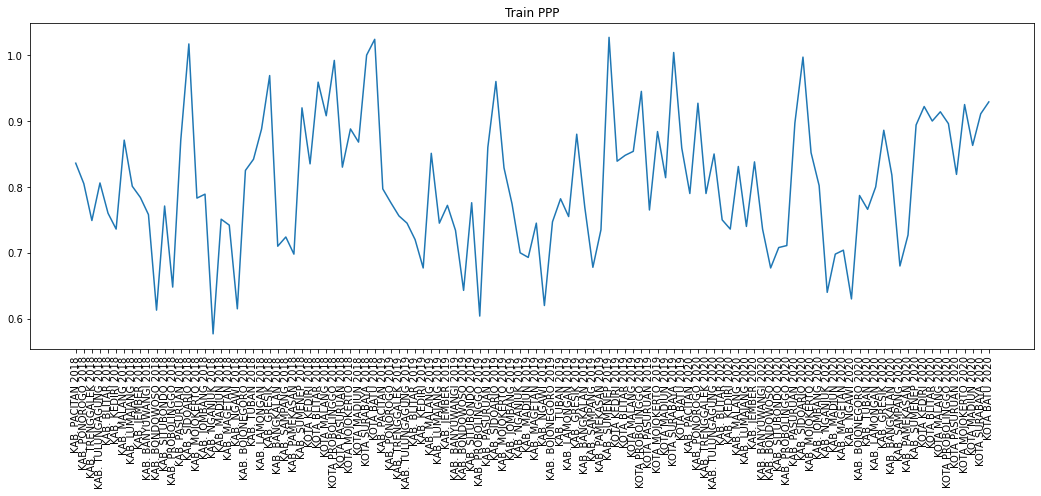

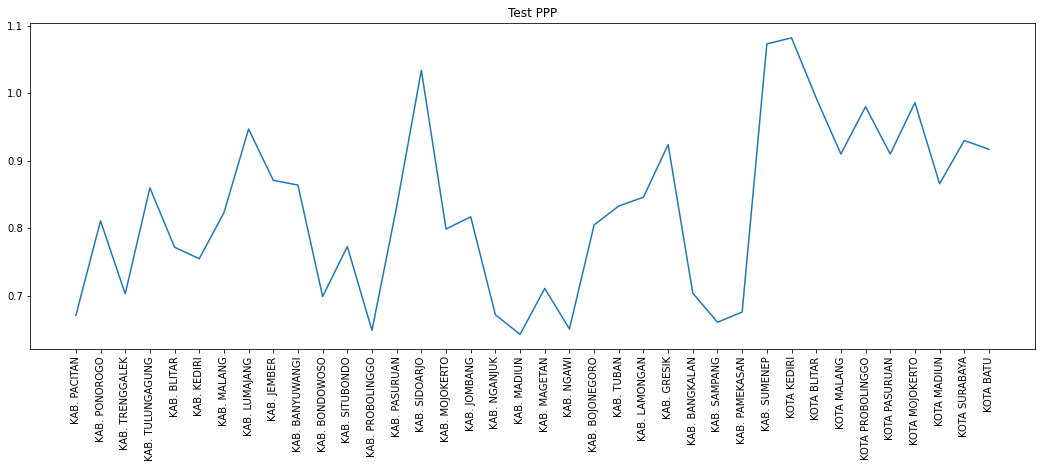

In [647]:
ppp_train_plot = []
ppp_test_plot = []
for i in range(len(df["PPP"])):
    if(i < 114):
        ppp_train_plot.append([df["PPP"][i]])
    if(i >= 114):
        ppp_test_plot.append([df["PPP"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, ppp_train_plot)
plt.title("Train PPP")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, ppp_test_plot)
plt.title("Test PPP")
plt.show()

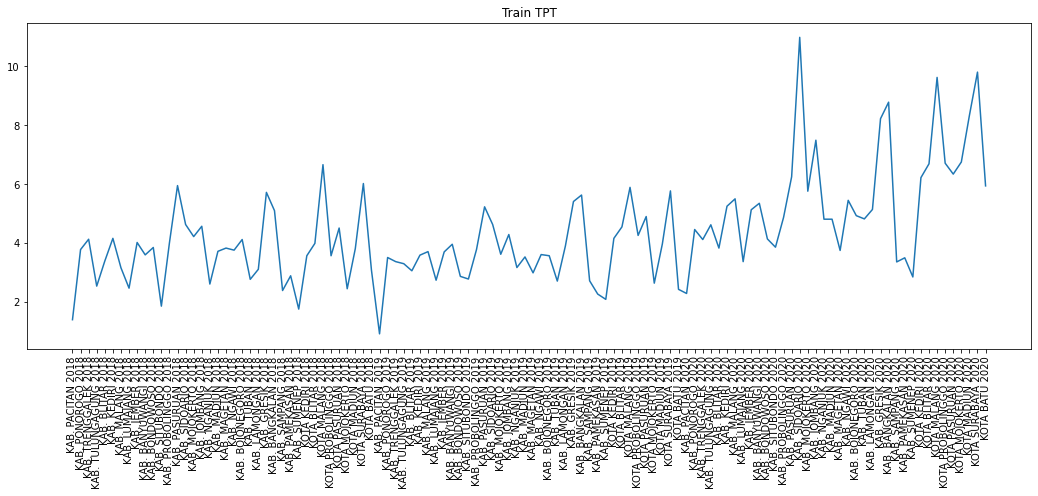

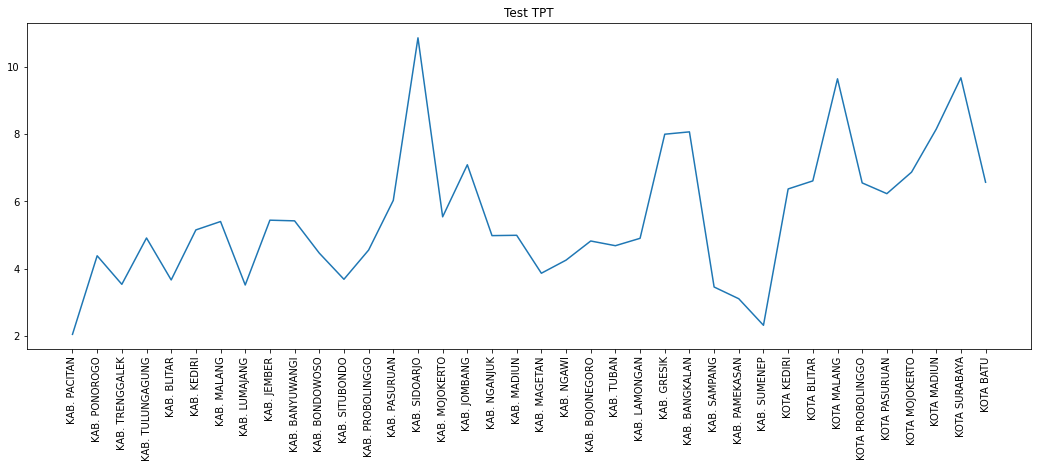

In [648]:
tpt_train_plot = []
ppp_test_plot = []
for i in range(len(df["TPT"])):
    if(i < 114):
        tpt_train_plot.append([df["TPT"][i]])
    if(i >= 114):
        ppp_test_plot.append([df["TPT"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, tpt_train_plot)
plt.title("Train TPT")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, ppp_test_plot)
plt.title("Test TPT")
plt.show()

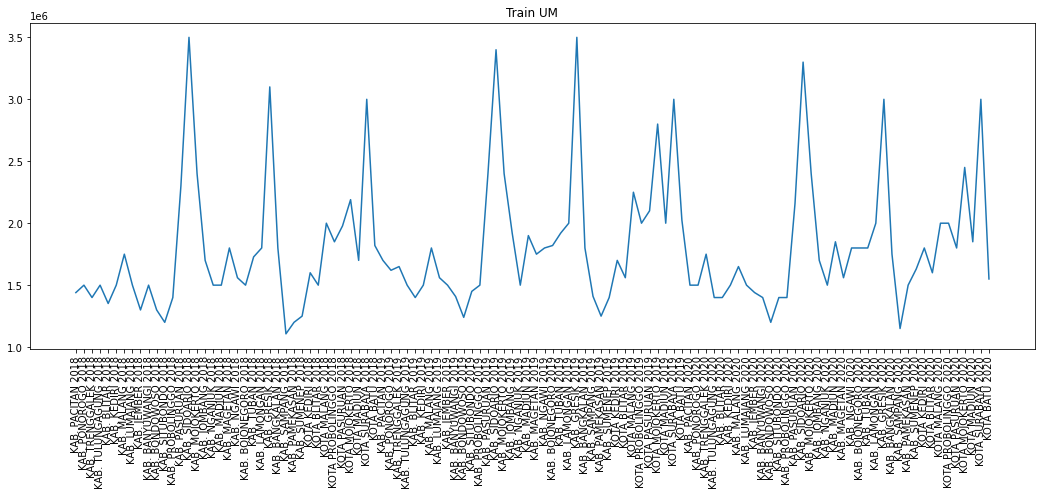

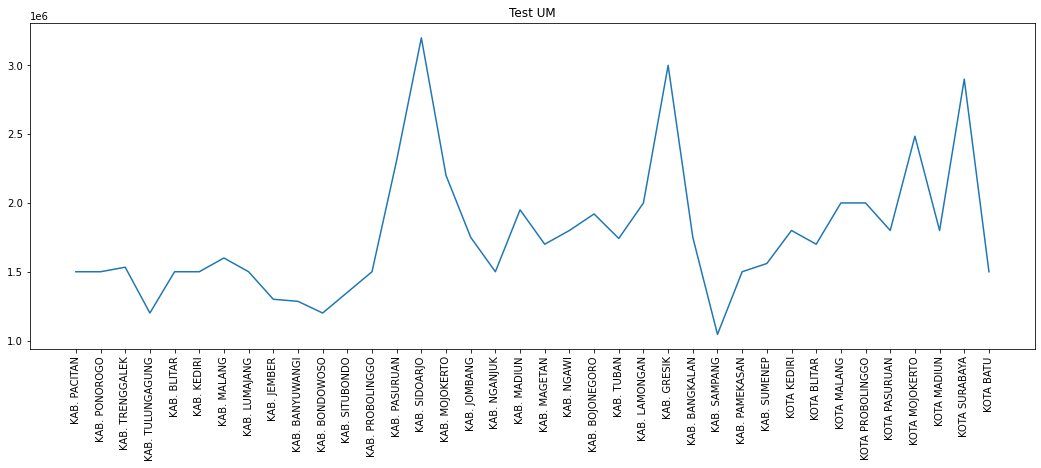

In [649]:
um_train_plot = []
um_test_plot = []
for i in range(len(df["Median Upah"])):
    if(i < 114):
        um_train_plot.append([df["Median Upah"][i]])
    if(i >= 114):
        um_test_plot.append([df["Median Upah"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, um_train_plot)
plt.title("Train UM")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, um_test_plot)
plt.title("Test UM")
plt.show()

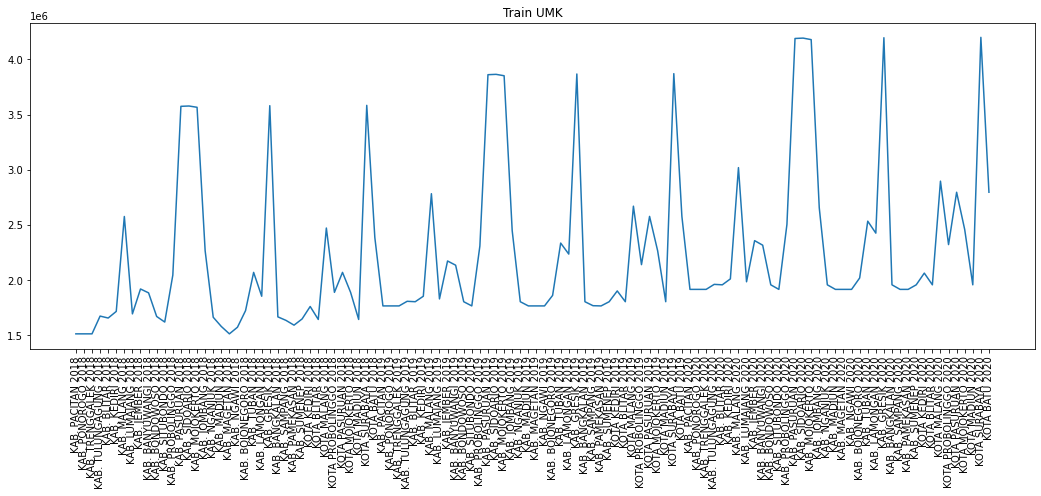

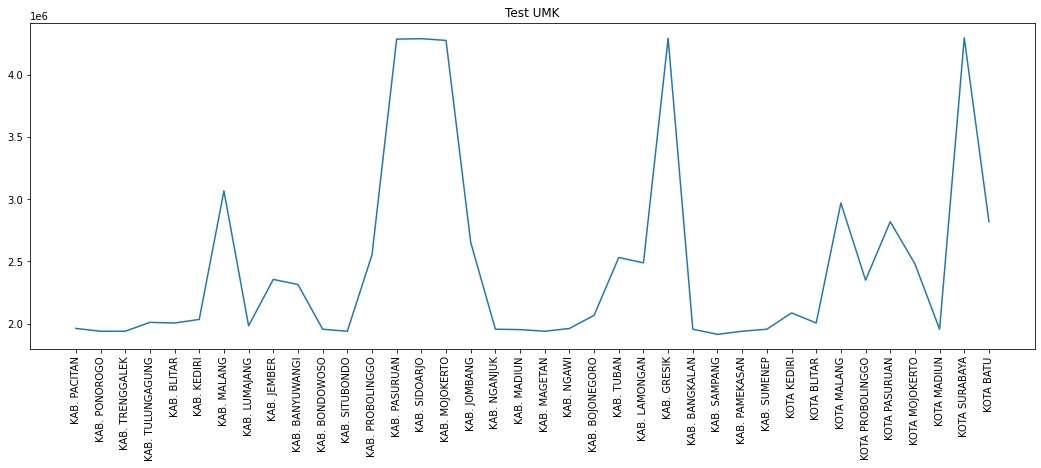

In [650]:
y_train_plot = []
y_test_plot = []
for i in range(len(df["UMK"])):
    if(i < 114):
        y_train_plot.append([df["UMK"][i]])
    if(i >= 114):
        y_test_plot.append([df["UMK"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, y_train_plot)
plt.title("Train UMK")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, y_test_plot)
plt.title("Test UMK")
plt.show()

In [651]:
np.random.seed(125)

class Layer_1:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 1 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_1:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 1 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_1.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_1.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(125)

class Layer_2:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 2 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_2:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 2 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_2.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_2.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

class Layer_3:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 3 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r

np.random.seed(125)

class NeuralNetwork_3:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 3 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_3.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_3.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
            
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(125)

class Layer_4:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 4 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_4:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 4 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_4.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_4.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(125)

class Layer_5:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 5 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_5:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 5 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_5.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_5.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned   

np.random.seed(125)

class Layer_6:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 6 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_6:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 6 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_6.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_6.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(125)

class Layer_7:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 7 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_7:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 7 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_7.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_7.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(125)

class Layer_8:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 8 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_8:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 8 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_8.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_8.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 250 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned     

In [652]:
def denormalize_data(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [653]:
nn_1 = NeuralNetwork_1()
nn_1.add_layer(Layer_1(3, 2, 'sigmoid'))
nn_1.add_layer(Layer_1(2, 1, 'sigmoid'))
errors_1 = nn_1.train(x_train.T, y_train, 0.1, 500)

nn_2 = NeuralNetwork_2()
nn_2.add_layer(Layer_2(3, 3, 'sigmoid'))
nn_2.add_layer(Layer_2(3, 1, 'sigmoid'))
errors_2 = nn_2.train(x_train.T, y_train, 0.1, 500)

nn_3 = NeuralNetwork_3()
nn_3.add_layer(Layer_3(3, 4, 'sigmoid'))
nn_3.add_layer(Layer_3(4, 1, 'sigmoid'))
errors_3 = nn_3.train(x_train.T, y_train, 0.1, 500)

nn_4 = NeuralNetwork_4()
nn_4.add_layer(Layer_4(3, 5, 'sigmoid'))
nn_4.add_layer(Layer_4(5, 1, 'sigmoid'))
errors_4 = nn_4.train(x_train.T, y_train, 0.1, 500)

nn_5 = NeuralNetwork_5()
nn_5.add_layer(Layer_5(3, 2, 'sigmoid'))
nn_5.add_layer(Layer_5(2, 1, 'sigmoid'))
errors_5 = nn_5.train(x_train.T, y_train, 0.15, 750)

nn_6 = NeuralNetwork_6()
nn_6.add_layer(Layer_6(3, 3, 'sigmoid'))
nn_6.add_layer(Layer_6(3, 1, 'sigmoid'))
errors_6 = nn_6.train(x_train.T, y_train, 0.15, 750)

nn_7 = NeuralNetwork_7()
nn_7.add_layer(Layer_7(3, 4, 'sigmoid'))
nn_7.add_layer(Layer_7(4, 1, 'sigmoid'))
errors_7 = nn_7.train(x_train.T, y_train, 0.15, 750)

nn_8 = NeuralNetwork_8()
nn_8.add_layer(Layer_8(3, 5, 'sigmoid'))
nn_8.add_layer(Layer_8(5, 1, 'sigmoid'))
errors_8 = nn_8.train(x_train.T, y_train, 0.15, 750)

Model 1 Initial weights:  [[-0.69883694  0.01062308]
 [-0.94678644  0.32872998]
 [ 0.31506457 -0.40282244]]
Model 1 Initial weights:  [[-0.40732612]
 [ 2.68696775]]
==================== Model 1 Training Start ====================
Epoch: #250, MSE: 0.048355, MAPE: 21.356632, Acc: 78.643368
Epoch: #500, MSE: 0.042202, MAPE: 19.702453, Acc: 80.297547
Model 2 Initial weights:  [[-0.40366892  0.10192369  1.19598142]
 [ 1.17241135  0.1691044  -0.49132423]
 [-0.82940313 -0.18964051  0.43325835]]
Model 2 Initial weights:  [[ 0.89568849]
 [-0.40319217]
 [-0.09986537]]
==================== Model 2 Training Start ====================
Epoch: #250, MSE: 0.057302, MAPE: 23.500020, Acc: 76.499980
Epoch: #500, MSE: 0.031626, MAPE: 18.966229, Acc: 81.033771
Model 3 Initial weights:  [[-0.2052044  -0.49902061  2.77815098  0.06200738]
 [-0.96401567  0.93484827 -1.27397971 -0.78526833]
 [-0.43116654 -1.27524129 -0.045631   -0.507225  ]]
Model 3 Initial weights:  [[ 0.61445721]
 [-0.67108296]
 [-0.76190747

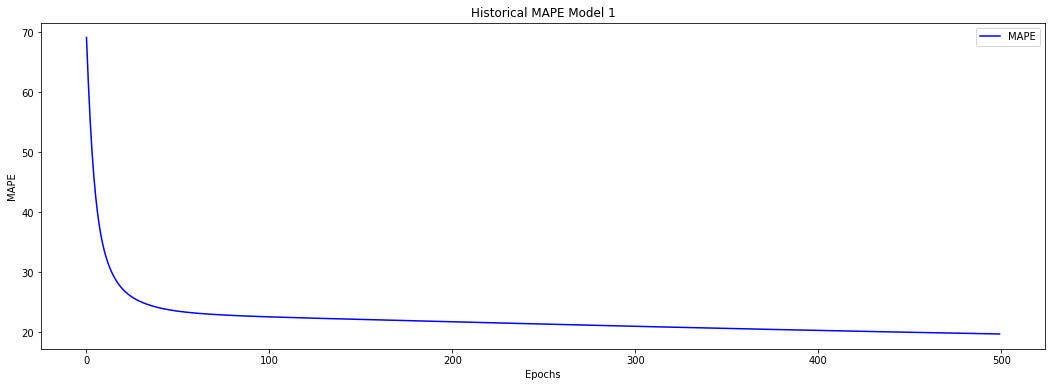

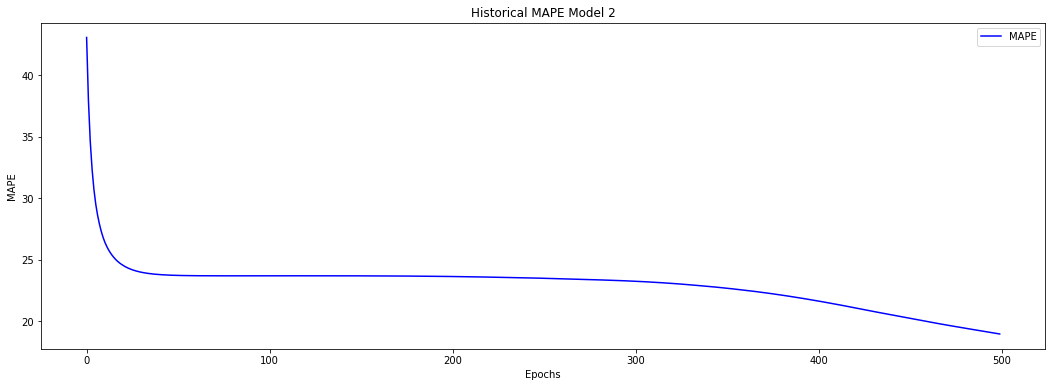

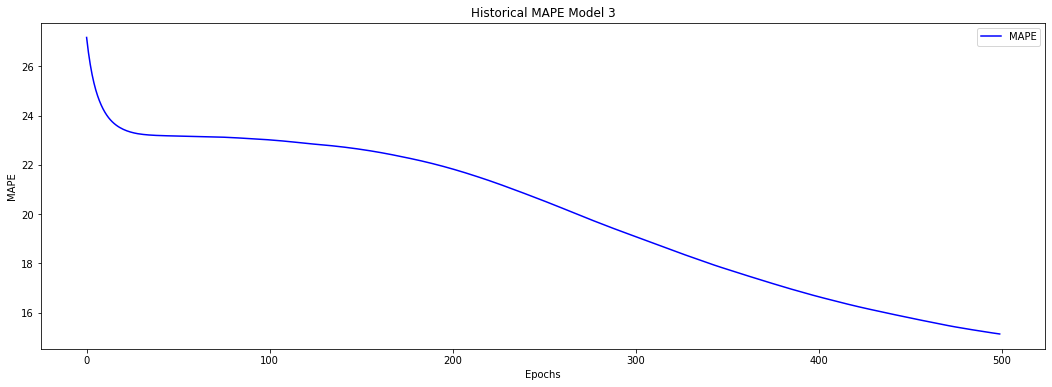

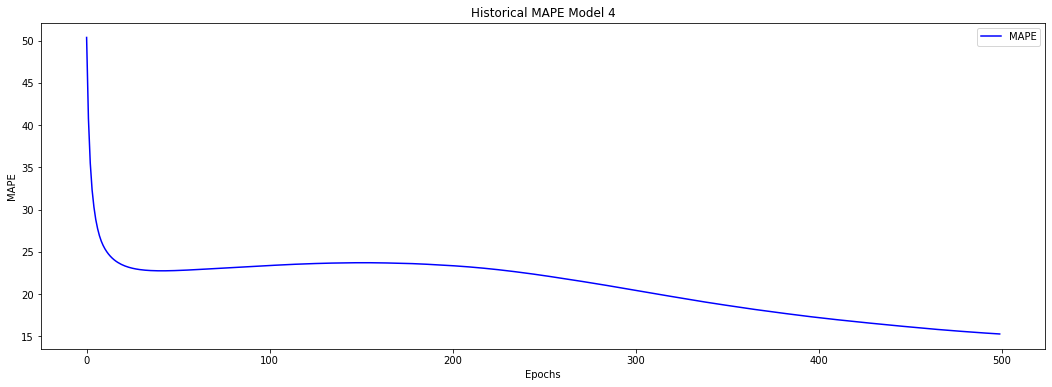

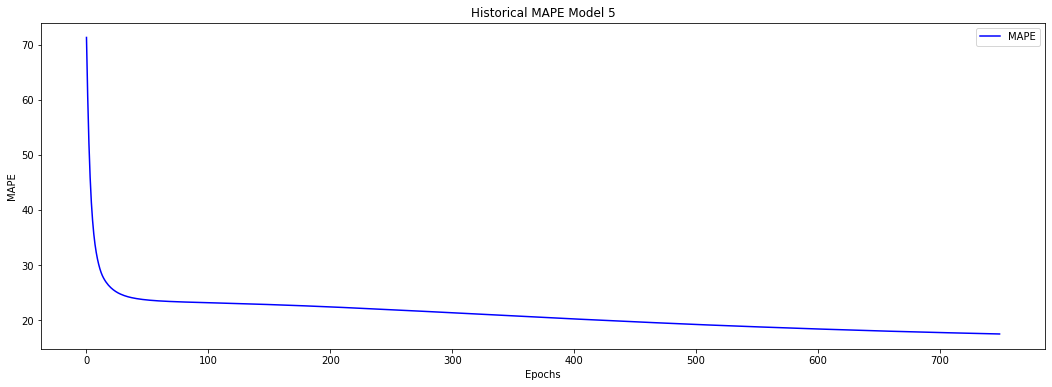

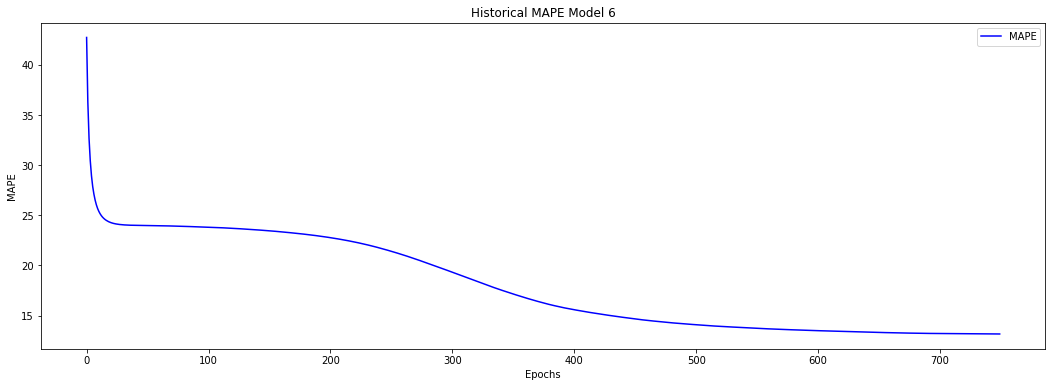

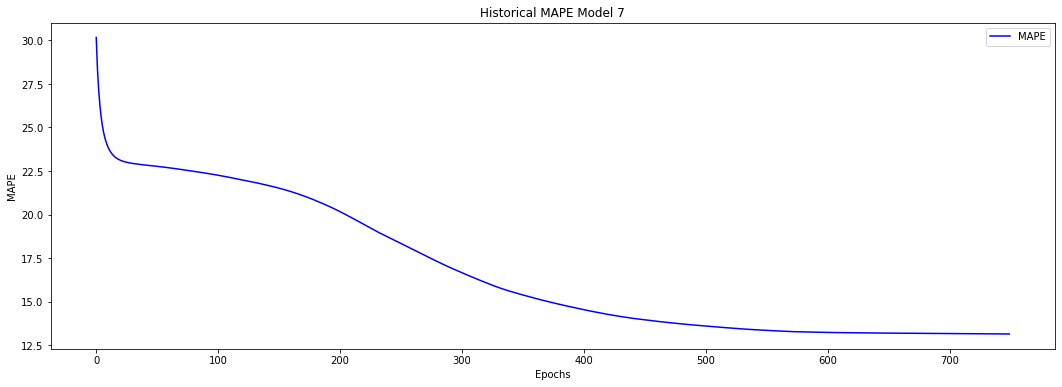

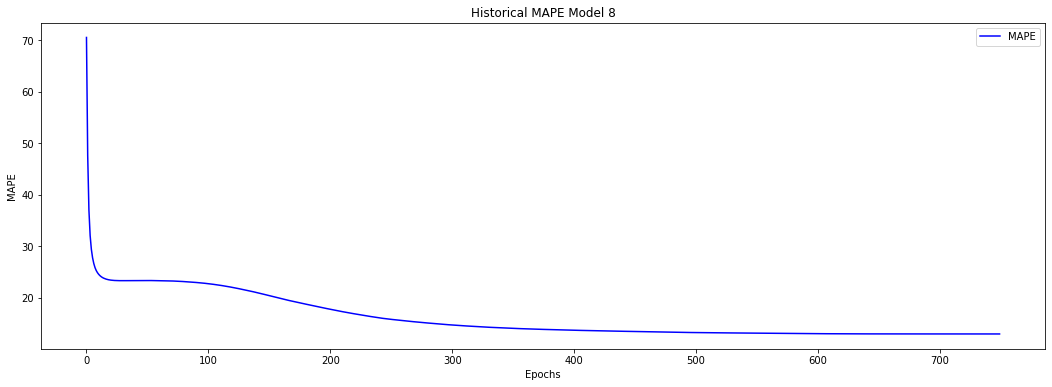

In [668]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 1')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 2')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 3')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 4')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 5')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 6')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 7')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 8')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()

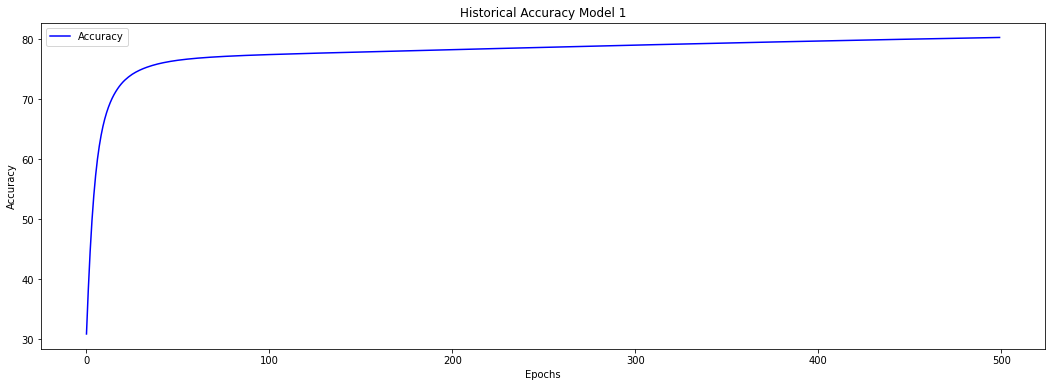

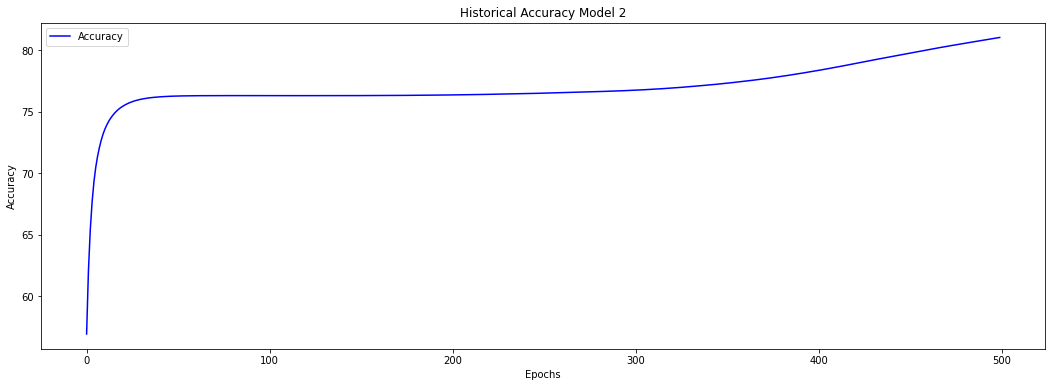

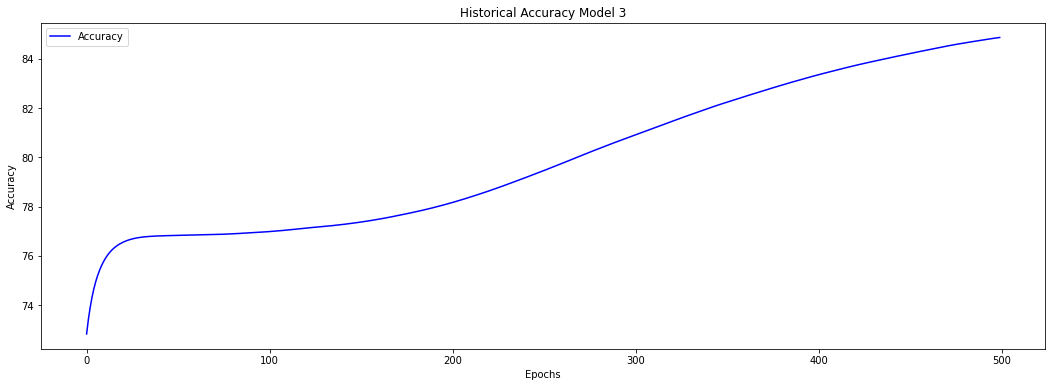

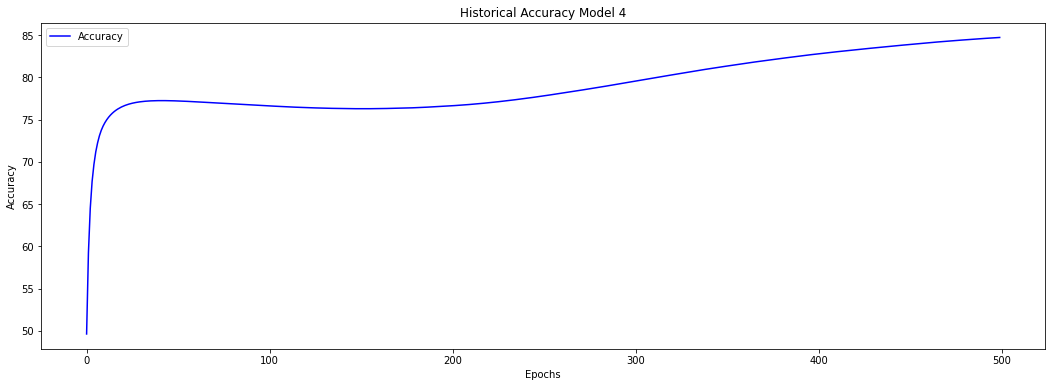

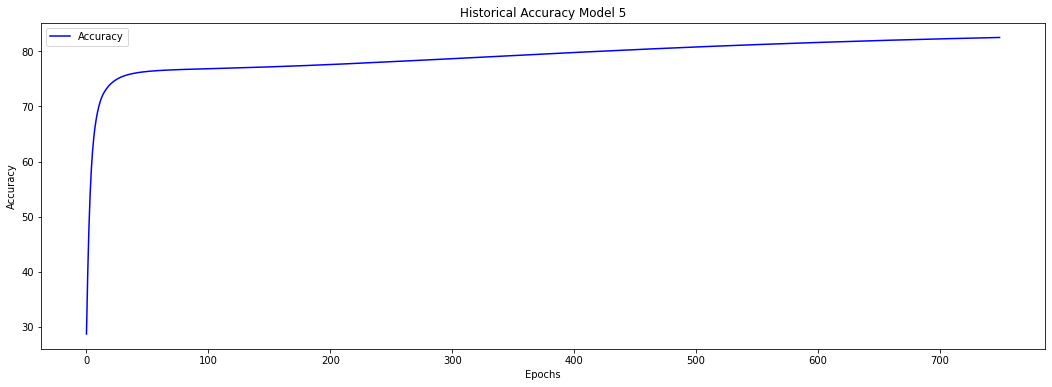

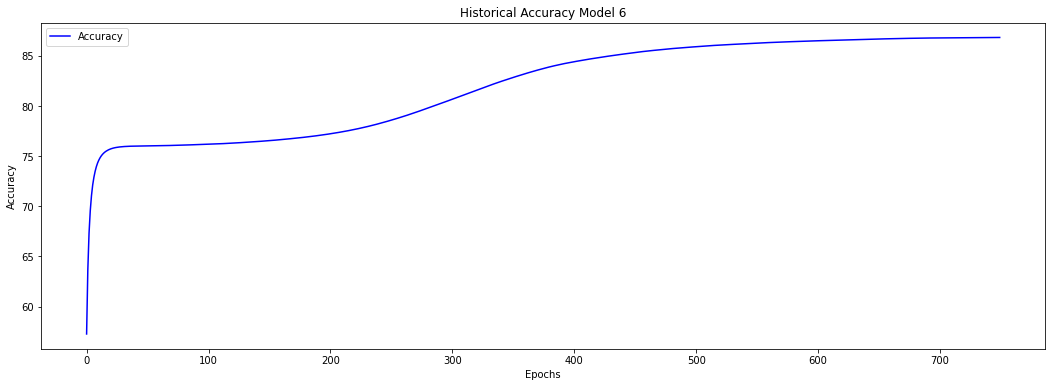

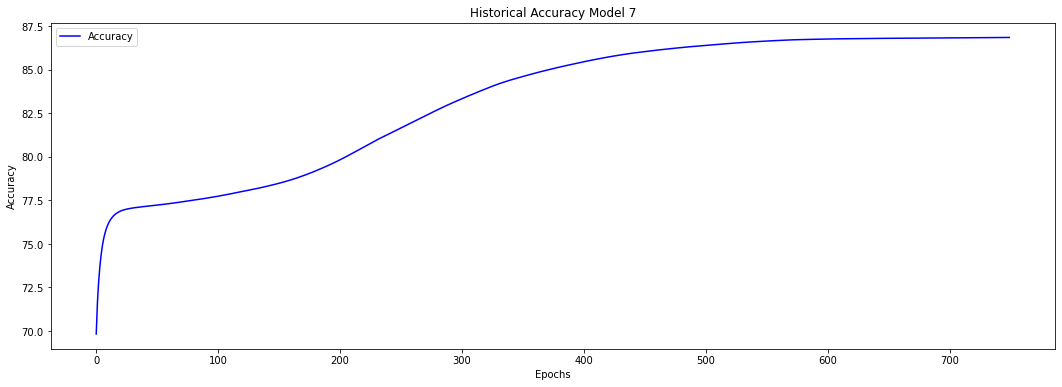

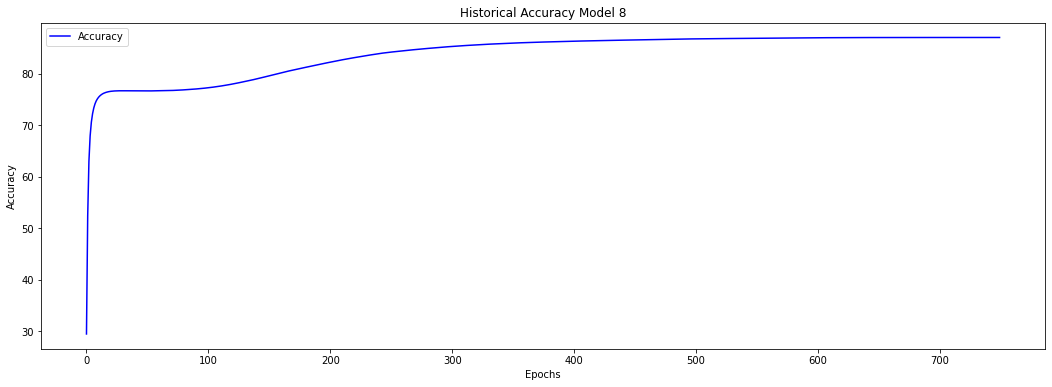

In [670]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 7')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 8')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

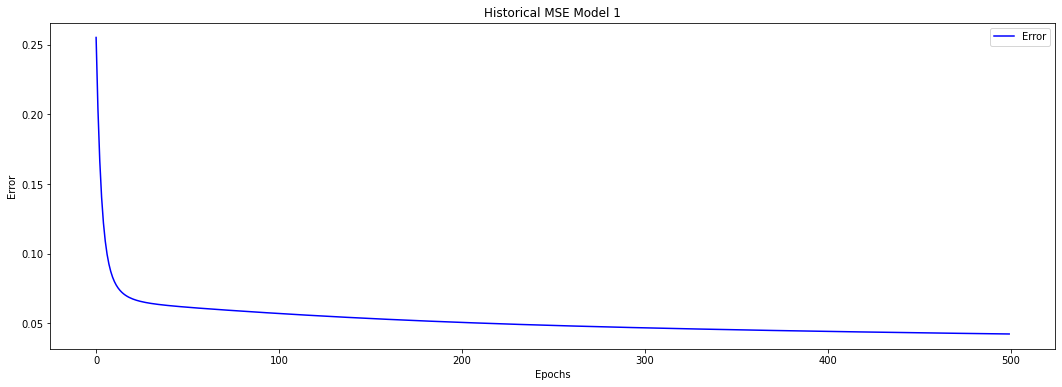

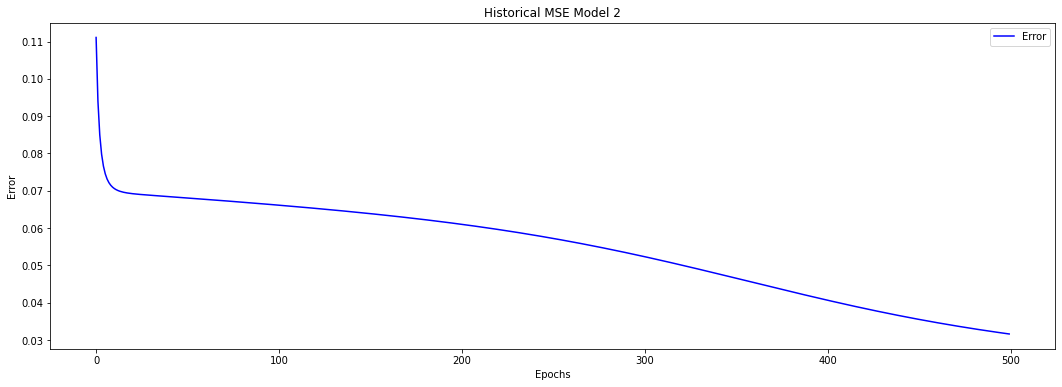

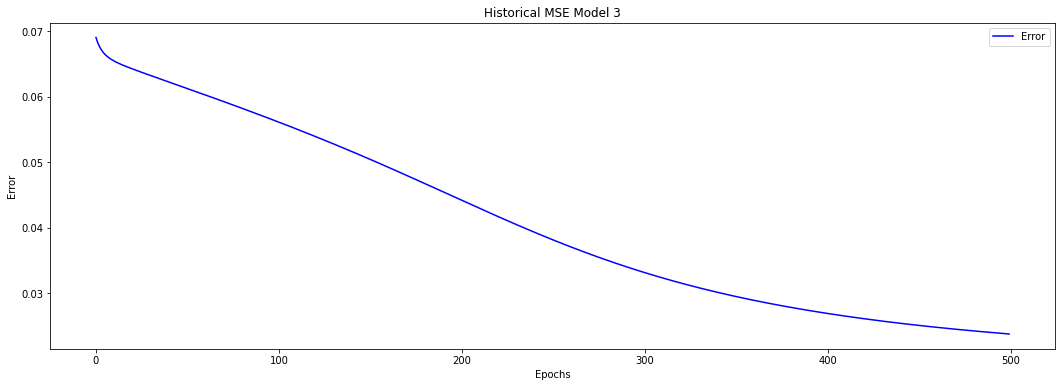

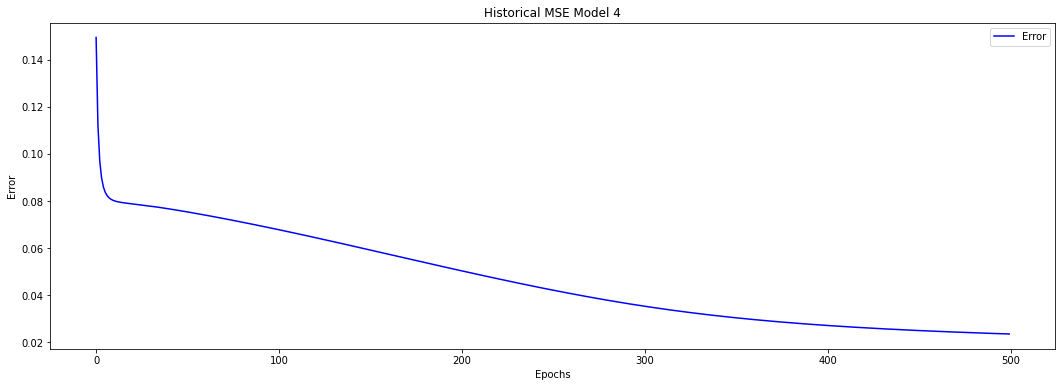

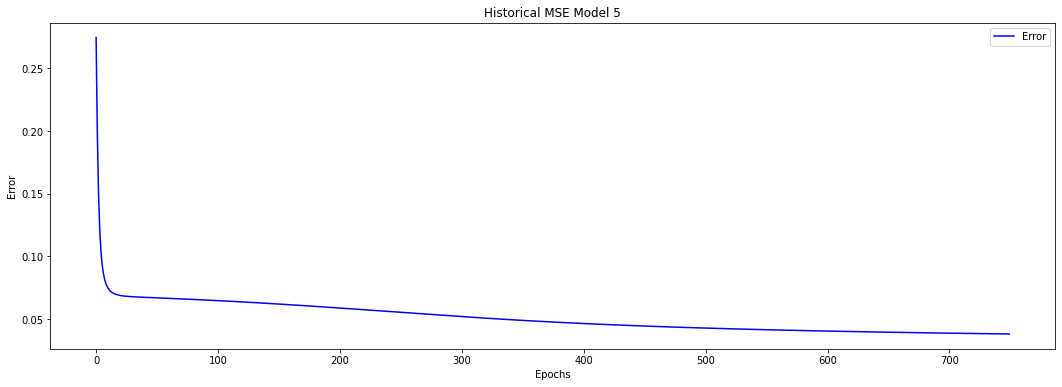

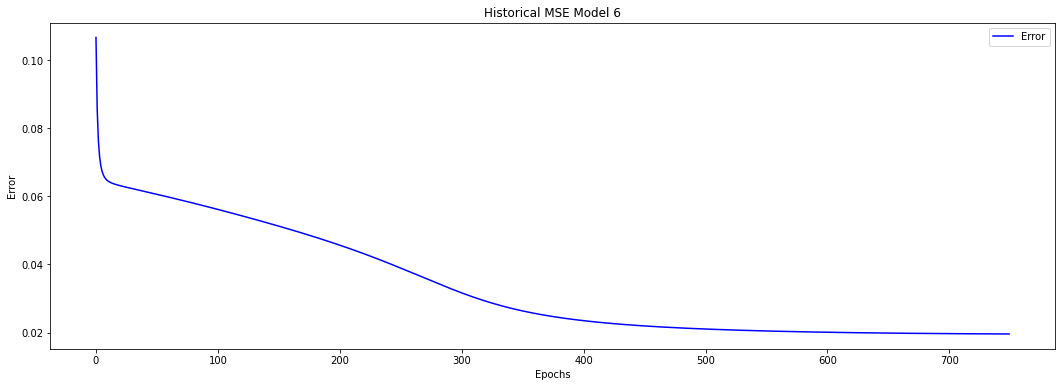

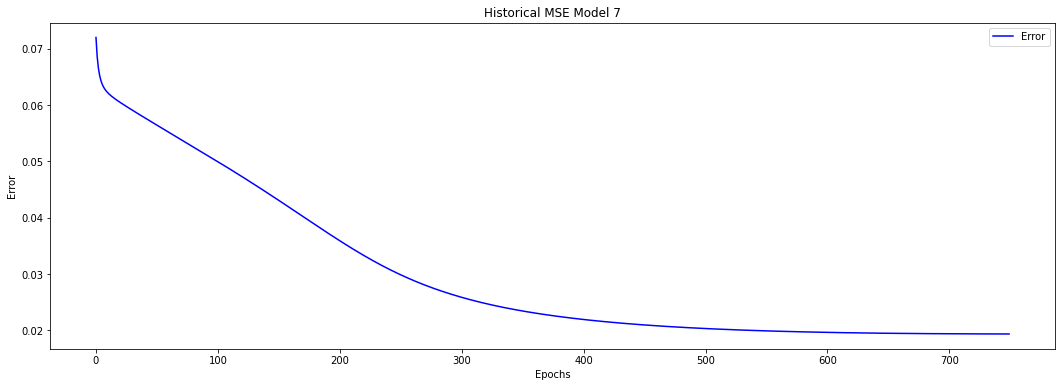

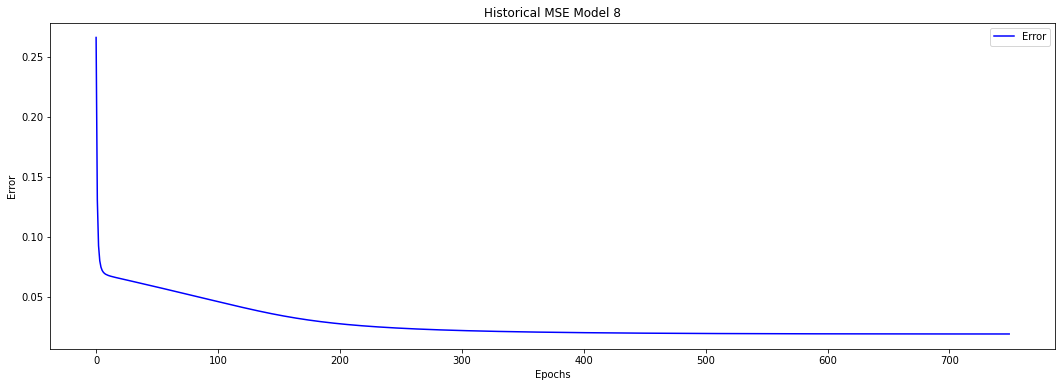

In [669]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 2')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 3')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 4')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 5')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 6')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 7')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 8')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [657]:
def denormalize(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [658]:
arr_1 = y_norm_1
arr_2 = y_norm_1
arr_3 = y_norm_1
arr_4 = y_norm_1
arr_5 = y_norm_1
arr_6 = y_norm_1
arr_7 = y_norm_1
arr_8 = y_norm_1
predict_1_1 = nn_1.predict(x_test.T)
for i in range(len(predict_1_1)):
    arr_1.append(predict_1_1[i].tolist())

predict_1_2 = nn_2.predict(x_test.T)
for i in range(len(predict_1_2)):
    arr_2.append(predict_1_2[i].tolist())

predict_1_3 = nn_3.predict(x_test.T)
for i in range(len(predict_1_3)):
    arr_3.append(predict_1_3[i].tolist())

predict_1_4 = nn_4.predict(x_test.T)
for i in range(len(predict_1_4)):
    arr_4.append(predict_1_4[i].tolist())
  
predict_1_5 = nn_5.predict(x_test.T)
for i in range(len(predict_1_5)):
    arr_5.append(predict_1_5[i].tolist())
  
predict_1_6 = nn_6.predict(x_test.T)
for i in range(len(predict_1_6)):
    arr_6.append(predict_1_6[i].tolist())
  
predict_1_7 = nn_7.predict(x_test.T)
for i in range(len(predict_1_7)):
    arr_7.append(predict_1_7[i].tolist())
  
predict_1_8 = nn_8.predict(x_test.T)
for i in range(len(predict_1_8)):
    arr_8.append(predict_1_8[i].tolist())

In [659]:
denormalize_1 = denormalize(arr_1, y)
denormalize_2 = denormalize(arr_2, y)
denormalize_3 = denormalize(arr_3, y)
denormalize_4 = denormalize(arr_4, y)
denormalize_5 = denormalize(arr_4, y)
denormalize_6 = denormalize(arr_4, y)
denormalize_7 = denormalize(arr_4, y)
denormalize_8 = denormalize(arr_4, y)

In [660]:
predicted_1_1 = []
actual_1_1 = []
predicted_2_1 = []
actual_2_1 = []

predicted_1_2 = []
actual_1_2 = []
predicted_2_2 = []
actual_2_2 = []

predicted_1_3 = []
actual_1_3 = []
predicted_2_3 = []
actual_2_3 = []

predicted_1_4 = []
actual_1_4 = []
predicted_2_4 = []
actual_2_4 = []

predicted_1_5 = []
actual_1_5 = []
predicted_2_5 = []
actual_2_5 = []

predicted_1_6 = []
actual_1_6 = []
predicted_2_6 = []
actual_2_6 = []

predicted_1_7 = []
actual_1_7 = []
predicted_2_7 = []
actual_2_7 = []

predicted_1_8 = []
actual_1_8 = []
predicted_2_8 = []
actual_2_8 = []

In [661]:
for i in range(len(denormalize_1)):
    if(i >= 114 and i <= 151):
        actual_1_1.append(denormalize_1[i])
        actual_2_1.append(arr_1[i])
    if(i >= 152 and i <= 189):
        predicted_1_1.append(denormalize_1[i])
        predicted_2_1.append(arr_1[i])

for i in range(len(denormalize_2)):
    if(i >= 114 and i <= 151):
        actual_1_2.append(denormalize_2[i])
        actual_2_2.append(arr_2[i])
    if(i >= 190 and i <= 227):
        predicted_1_2.append(denormalize_2[i])
        predicted_2_2.append(arr_2[i])

for i in range(len(denormalize_3)):
    if(i >= 114 and i <= 151):
        actual_1_3.append(denormalize_3[i])
        actual_2_3.append(arr_3[i])
    if(i >= 228 and i <= 265):
        predicted_1_3.append(denormalize_3[i])
        predicted_2_3.append(arr_3[i])

for i in range(len(denormalize_4)):
    if(i >= 114 and i <= 151):
        actual_1_4.append(denormalize_4[i])
        actual_2_4.append(arr_4[i])
    if(i >= 266 and i <= 303):
        predicted_1_4.append(denormalize_4[i])
        predicted_2_4.append(arr_4[i])

for i in range(len(denormalize_5)):
    if(i >= 114 and i <= 151):
        actual_1_5.append(denormalize_5[i])
        actual_2_5.append(arr_5[i])
    if(i >= 304 and i <= 341):
        predicted_1_5.append(denormalize_5[i])
        predicted_2_5.append(arr_5[i])

for i in range(len(denormalize_6)):
    if(i >= 114 and i <= 151):
        actual_1_6.append(denormalize_6[i])
        actual_2_6.append(arr_6[i])
    if(i >= 342 and i <= 379):
        predicted_1_6.append(denormalize_6[i])
        predicted_2_6.append(arr_6[i])

for i in range(len(denormalize_7)):
    if(i >= 114 and i <= 151):
        actual_1_7.append(denormalize_7[i])
        actual_2_7.append(arr_7[i])
    if(i >= 380 and i <= 417):
        predicted_1_7.append(denormalize_7[i])
        predicted_2_7.append(arr_7[i])

for i in range(len(denormalize_8)):
    if(i >= 114 and i <= 151):
        actual_1_8.append(denormalize_8[i])
        actual_2_8.append(arr_8[i])
    if(i >= 418 and i <= 455):
        predicted_1_8.append(denormalize_8[i])
        predicted_2_8.append(arr_8[i])

In [662]:
def mse(actual, pred):
    return np.square(np.subtract(actual, pred)).mean()

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [663]:
error_train = np.array([
    ["Model 1", 2, 500, 0.1, errors_1[0][-1], errors_1[1][-1], errors_1[2][-1], errors_1[-1]],
    ["Model 2", 3, 500, 0.1, errors_2[0][-1], errors_2[1][-1], errors_2[2][-1], errors_2[-1]],
    ["Model 3", 4, 500, 0.1, errors_3[0][-1], errors_3[1][-1], errors_3[2][-1], errors_3[-1]],
    ["Model 4", 5, 500, 0.1, errors_4[0][-1], errors_4[1][-1], errors_4[2][-1], errors_4[-1]],
    ["Model 5", 2, 750, 0.15, errors_5[0][-1], errors_5[1][-1], errors_5[2][-1], errors_5[-1]],
    ["Model 6", 3, 750, 0.15, errors_6[0][-1], errors_6[1][-1], errors_6[2][-1], errors_6[-1]],
    ["Model 7", 4, 750, 0.15, errors_7[0][-1], errors_7[1][-1], errors_7[2][-1], errors_7[-1]],
    ["Model 8", 5, 750, 0.15, errors_8[0][-1], errors_8[1][-1], errors_8[2][-1], errors_8[-1]],
])

error_table = pd.DataFrame(error_train, columns = ['Model', 'Hidden Neuron', 'Learning Rate', 'Epoch', 'MSE', 'MAPE', 'Akurasi', 'Elapsed Time'])

error_table

,Model,Hidden Neuron,Learning Rate,Epoch,MSE,MAPE,Akurasi,Elapsed Time
0,Model 1,2,500,0.1,0.04220240783955827,19.70245313444869,80.29754686555131,7.6261515617370605
1,Model 2,3,500,0.1,0.03162596426379967,18.96622907198674,81.03377092801327,7.497865200042725
2,Model 3,4,500,0.1,0.023792297026349753,15.136887211768821,84.86311278823118,7.286598205566406
3,Model 4,5,500,0.1,0.023525782977523786,15.257636084831871,84.74236391516813,7.299723386764526
4,Model 5,2,750,0.15,0.038176498013031704,17.49828278491786,82.50171721508214,11.119028091430664
5,Model 6,3,750,0.15,0.019587083509153617,13.167275870243811,86.83272412975619,11.195905447006226
6,Model 7,4,750,0.15,0.019344514887257167,13.137626645774905,86.8623733542251,13.294287919998169
7,Model 8,5,750,0.15,0.01900504142207805,13.013393517114105,86.98660648288589,10.799588441848755


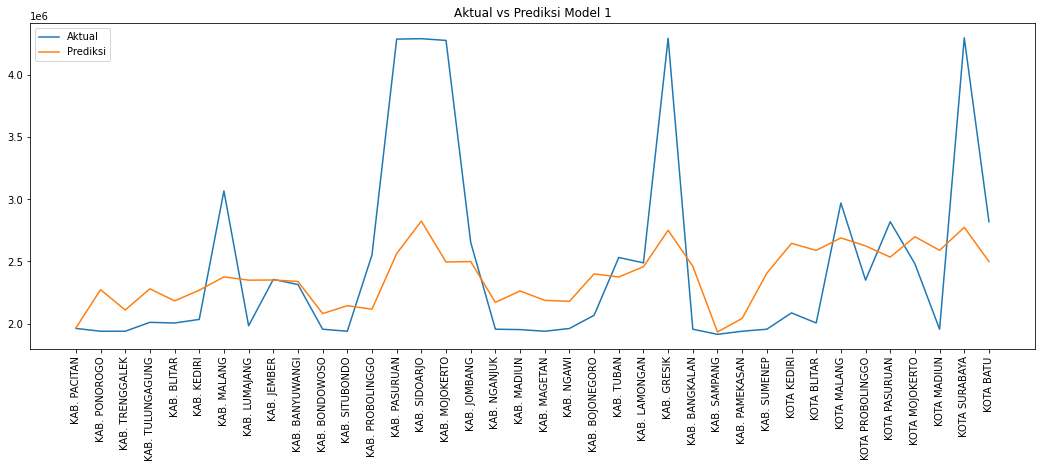

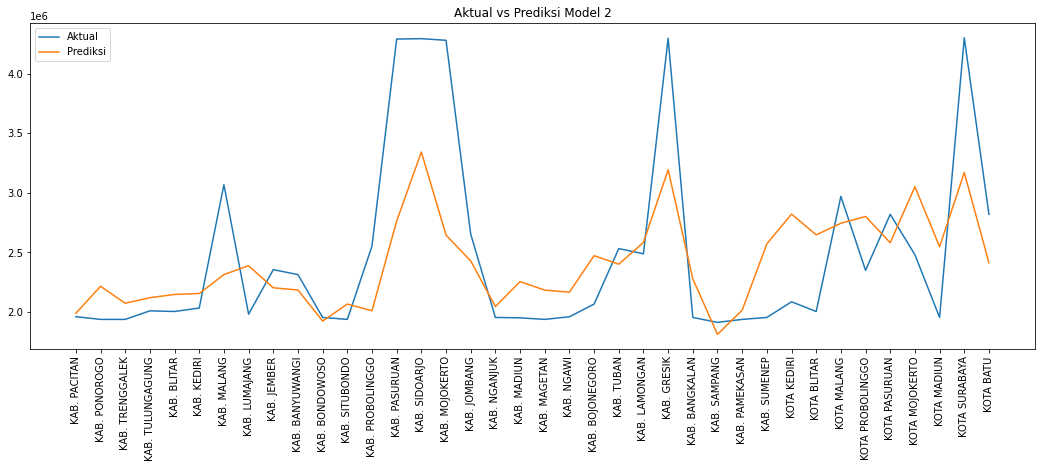

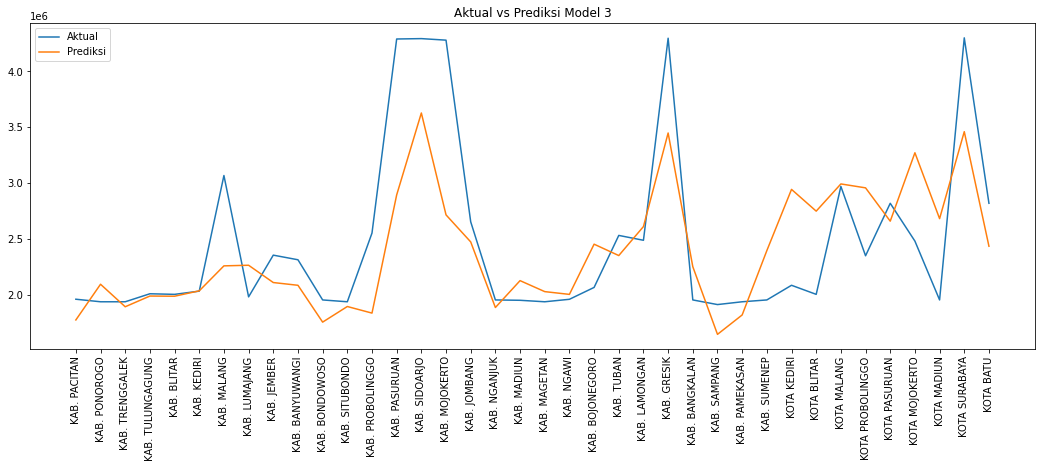

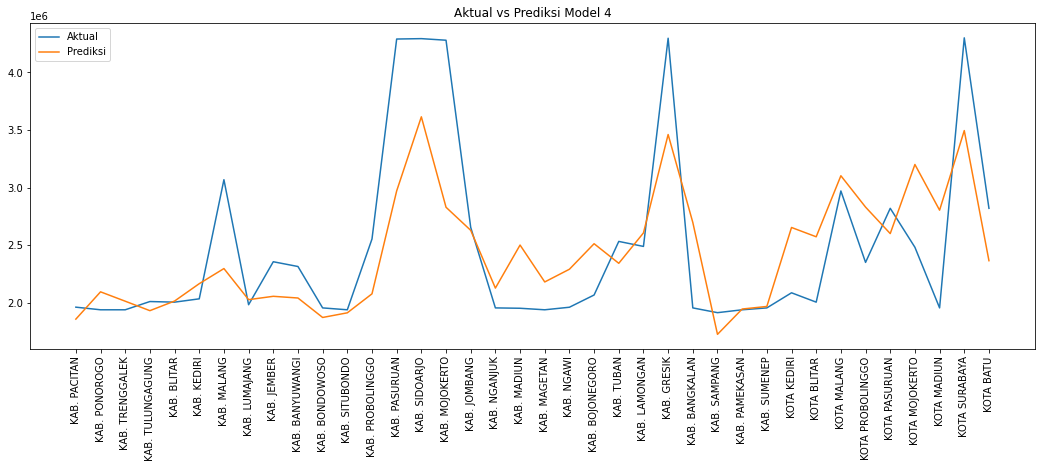

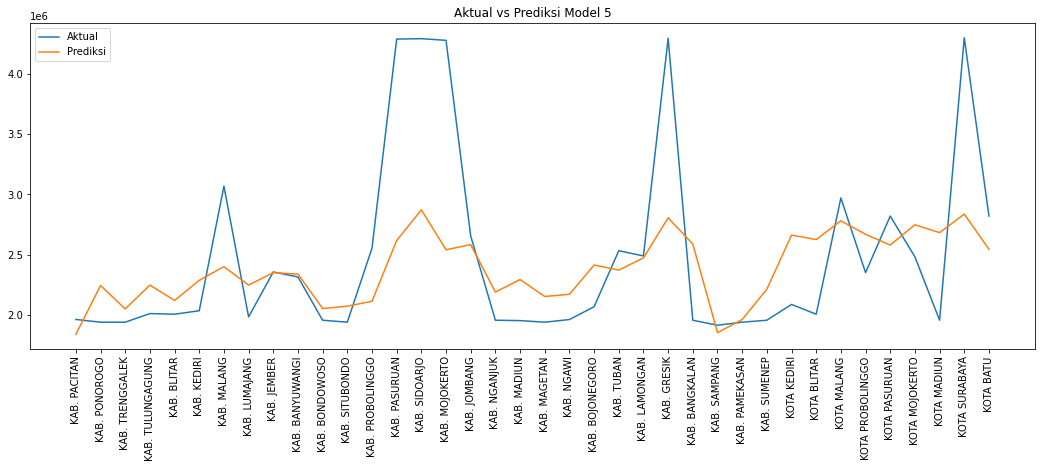

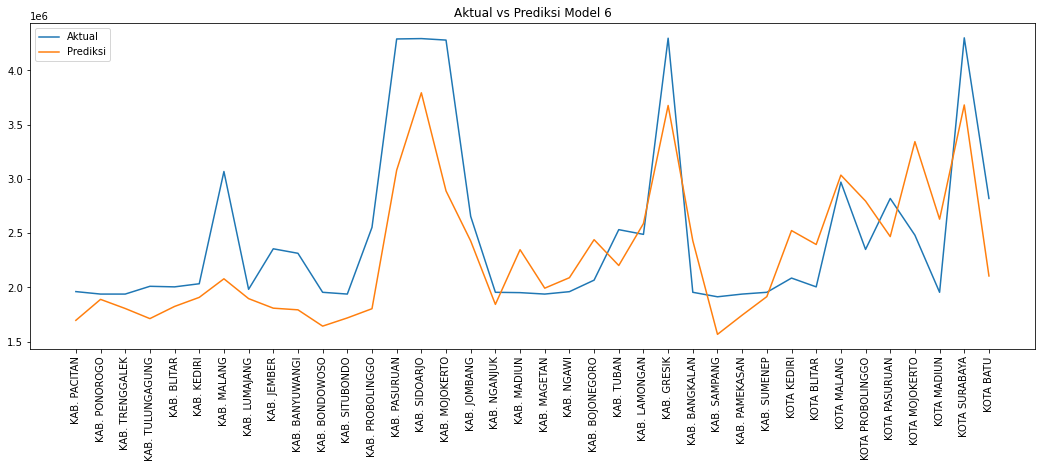

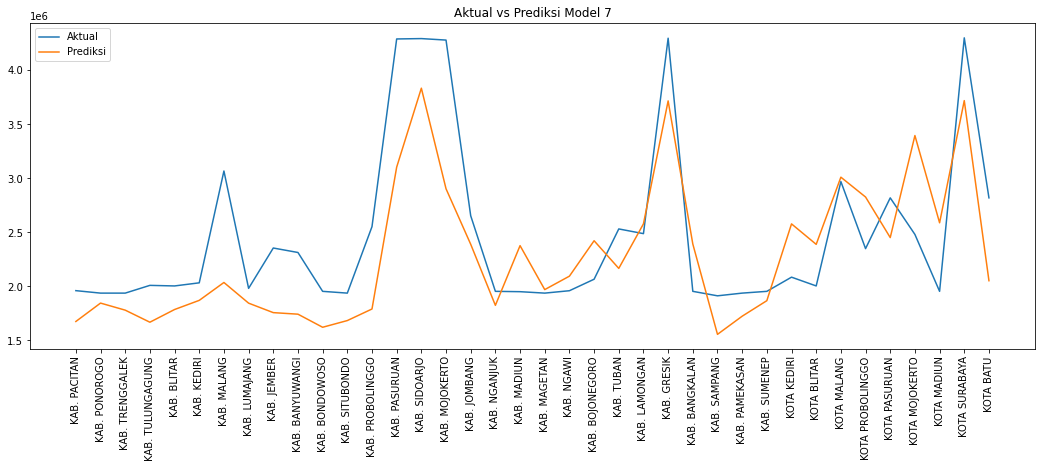

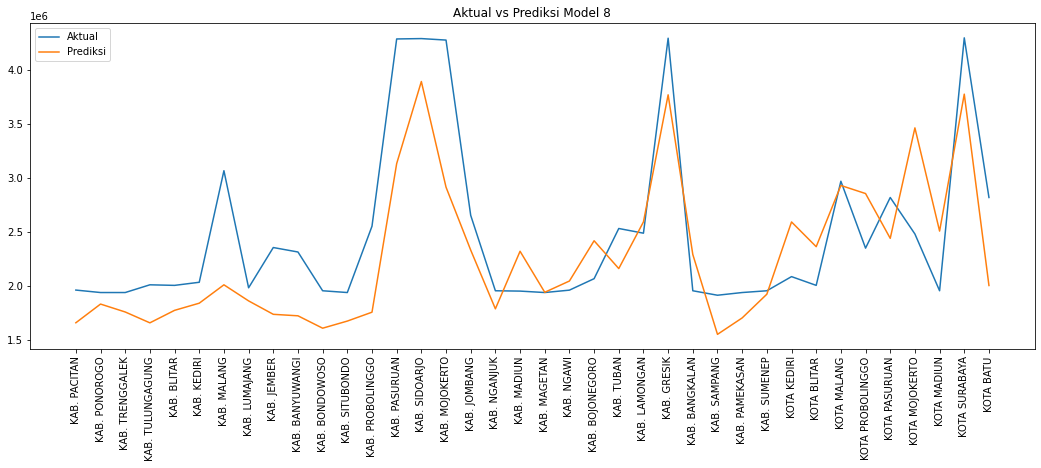

In [667]:
err_list = [errors_1[2][-1], errors_2[2][-1], errors_3[2][-1], errors_4[2][-1], errors_5[2][-1], errors_6[2][-1], errors_7[2][-1], errors_8[2][-1]]
max_acc = err_list[0]
best_index = 0
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i
        
# if(best_index == 0):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 1")
plt.plot(kota_kab_test, actual_1_1, label="Aktual")
plt.plot(predicted_1_1, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 1):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 2")
plt.plot(kota_kab_test, actual_1_2, label="Aktual")
plt.plot(predicted_1_2, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 2):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 3")
plt.plot(kota_kab_test, actual_1_3, label="Aktual")
plt.plot(predicted_1_3, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 3):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 4")
plt.plot(kota_kab_test, actual_1_4, label="Aktual")
plt.plot(predicted_1_4, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 4):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 5")
plt.plot(kota_kab_test, actual_1_5, label="Aktual")
plt.plot(predicted_1_5, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 5):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 6")
plt.plot(kota_kab_test, actual_1_6, label="Aktual")
plt.plot(predicted_1_6, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 6):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 7")
plt.plot(kota_kab_test, actual_1_7, label="Aktual")
plt.plot(predicted_1_7, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 7):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 8")
plt.plot(kota_kab_test, actual_1_8, label="Aktual")
plt.plot(predicted_1_8, label="Prediksi")
plt.legend()
plt.show()
print()

In [665]:
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i
        
if(best_index == 0):
    error_train = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 1):
    error_train = np.array([
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 2):
    error_train = np.array([
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 3):
    error_train = np.array([
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 4):
    error_train = np.array([
        ["Model 5", mse(actual_2_5, predicted_2_5), mape(actual_1_5, predicted_1_5), 100 - (mape(actual_1_5, predicted_1_5))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 5):
    error_train = np.array([
        ["Model 6", mse(actual_2_6, predicted_2_6), mape(actual_1_6, predicted_1_6), 100 - (mape(actual_1_6, predicted_1_6))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 6):
    error_train = np.array([
        ["Model 7", mse(actual_2_7, predicted_2_7), mape(actual_1_7, predicted_1_7), 100 - (mape(actual_1_7, predicted_1_7))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
elif(best_index == 7):
    error_train = np.array([
        ["Model 8", mse(actual_2_8, predicted_2_8), mape(actual_1_8, predicted_1_8), 100 - (mape(actual_1_8, predicted_1_8))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)

,Model,MSE,MAPE,Akurasi
0,Model 8,0.03557977124316106,16.365343351343213,83.63465664865679


In [666]:
error_train_1 = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
        ["Model 5", mse(actual_2_5, predicted_2_5), mape(actual_1_5, predicted_1_5), 100 - (mape(actual_1_5, predicted_1_5))],
        ["Model 6", mse(actual_2_6, predicted_2_6), mape(actual_1_6, predicted_1_6), 100 - (mape(actual_1_6, predicted_1_6))],
        ["Model 7", mse(actual_2_7, predicted_2_7), mape(actual_1_7, predicted_1_7), 100 - (mape(actual_1_7, predicted_1_7))],
        ["Model 8", mse(actual_2_8, predicted_2_8), mape(actual_1_8, predicted_1_8), 100 - (mape(actual_1_8, predicted_1_8))],
])
error_tables_1 = pd.DataFrame(error_train_1, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
display(error_tables_1)

,Model,MSE,MAPE,Akurasi
0,Model 1,0.05585792491515216,15.78601417242281,84.21398582757719
1,Model 2,0.042867492831801066,15.373349343589549,84.62665065641045
2,Model 3,0.03837275741938908,14.607572124334792,85.3924278756652
3,Model 4,0.035264933548650054,14.460269410752552,85.53973058924745
4,Model 5,0.052986475713339865,15.181964755815875,84.81803524418413
5,Model 6,0.0343641330312384,15.662703290738564,84.33729670926144
6,Model 7,0.03555548394973967,16.422697348098534,83.57730265190146
7,Model 8,0.03557977124316106,16.365343351343213,83.63465664865679
